In [1]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/summarize/news_summary.csv')
more_df = pd.read_csv('data/summarize/news_summary_more.csv')

In [3]:
df.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [4]:
more_df.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [5]:
def clean_data(text):
    text = re.sub(r"@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', text)
    text = text.lower().strip()
    
    return text

In [6]:
# Clean data
df['text'] = df['text'].apply(lambda x: clean_data(x))
df['headlines'] = df['headlines'].apply(lambda x: clean_data(x))

more_df['text'] = more_df['text'].apply(lambda x: clean_data(x))
more_df['headlines'] = more_df['headlines'].apply(lambda x: clean_data(x))

# Count text
df['text_count'] = df['text'].apply(lambda x: len(x.split()))
df['headlines_count'] = df['headlines'].apply(lambda x: len(x.split()))

more_df['text_count'] = more_df['text'].apply(lambda x: len(x.split()))
more_df['headlines_count'] = more_df['headlines'].apply(lambda x: len(x.split()))

In [7]:
df = pd.concat([df, more_df])
df = df.drop(['author', 'date', 'read_more', 'ctext'], axis=1)

# Visualization

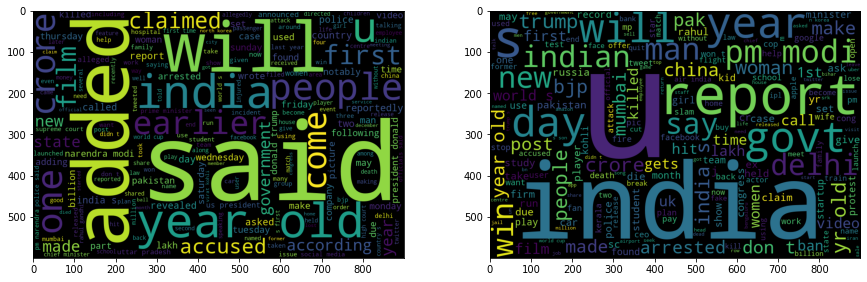

In [8]:
# Word Cloud
plt.figure(figsize=(15, 10))
wc = WordCloud(width=900, height=600)

plt.subplot(221)
wc.generate(' '.join(df['text']))
plt.imshow(wc)

plt.subplot(222)
wc.generate(' '.join(df['headlines']))
plt.imshow(wc)

plt.show()

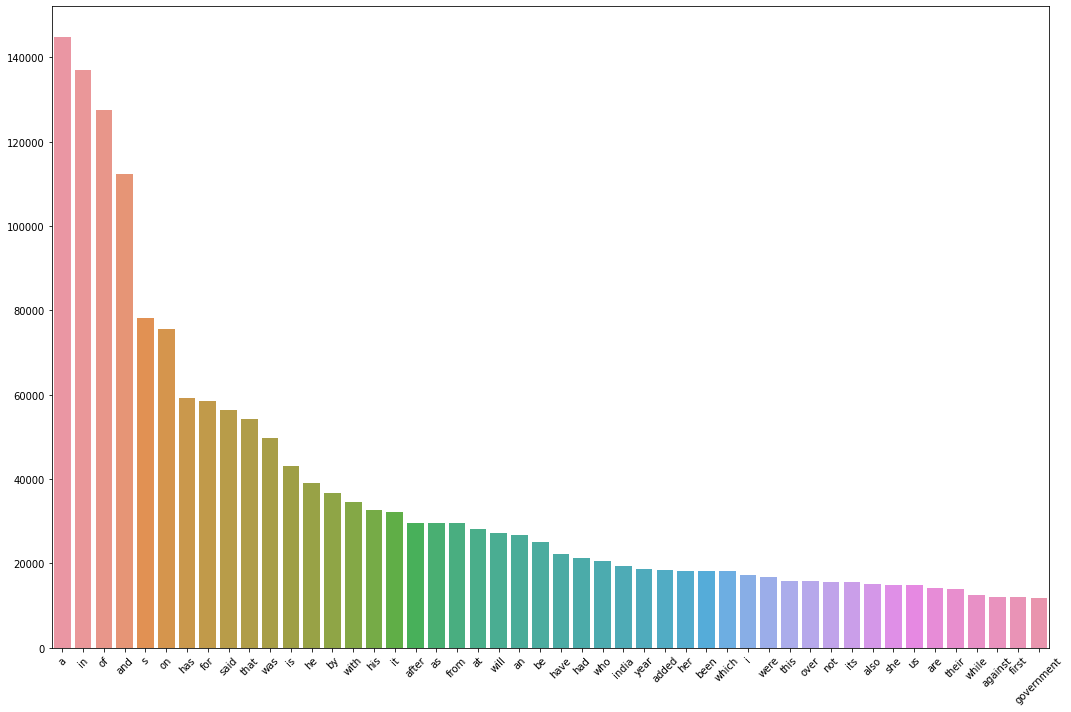

In [9]:
plt.figure(figsize=(15, 10))
all_words = df['text'].str.split(expand=True).unstack().value_counts()

sns.barplot(
    x=all_words.index.values[2:50],
    y = all_words.values[2:50]
)
plt.xticks(rotation=45)
plt.tight_layout()

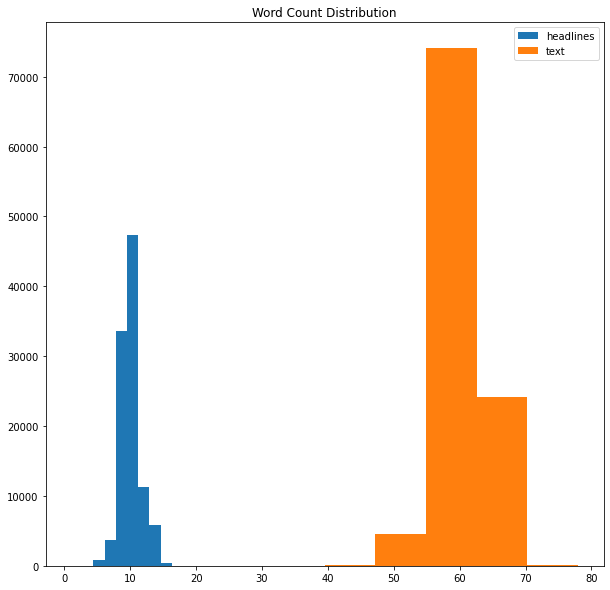

In [10]:
plt.figure(figsize=(10, 10))

plt.title('Word Count Distribution')
plt.hist(df['headlines_count'], label='headlines')
plt.hist(df['text_count'], label='text')

plt.legend()

# Write to new file

In [11]:
df.to_csv('data/summarize/news_data.csv', index=False)